# KISS-ICP running on the NCLT MulRan Dataset

The whole purpose of this notebook is to have a reproducable entry point for the experiments of the paper. You can also modify the system and just run this notebook to inspect the overall results.

## Expected dataset layout

```sh
MulRan
├── dcc
│   ├── DCC01
│   │   ├── data_stamp.csv
│   │   ├── global_pose.csv
│   │   ├── gps.csv
│   │   ├── navtech_top_stamp.csv
│   │   ├── Ouster
│   │   │   ├── 1564718964199537916.bin
│   │   │   ├── 1564718964300400595.bin
│   │   │   ├── ...
│   │   ├── ouster_front_stamp.csv
│   │   └── xsens_imu.csv
│   ├── DCC02
│   └── DCC03
├── kaist
│   ├── KAIST01
│   ├── KAIST02
│   └── KAIST03
├── riverside
│   ├── Riverside01
│   ├── Riverside02
│   └── Riverside03
└── sejong
    ├── Sejong01
    ├── Sejong02
    └── Sejong03
```

In [1]:
# Install KISS-ICP and Plotting tools
%pip install kiss-icp ipympl evo >/dev/null

import os
from pathlib import Path

import kiss_icp
import matplotlib.pyplot as plt
import numpy as np
from evo.tools import plot
from kiss_icp.config import load_config
from kiss_icp.datasets import dataset_factory
from kiss_icp.pipeline import OdometryPipeline
from rich import print

%autoreload 2
%matplotlib inline
%matplotlib widget

Note: you may need to restart the kernel to use updated packages.


In [2]:
data_root = os.environ.get("DATASETS")
data_dir = Path(os.path.join(data_root, "MulRan"))
cfg_file = os.path.join(os.path.dirname(kiss_icp.__file__), "config/default.yaml")

print(f"Reading datasets from : {data_root}")
print(f"Configuration:")
print(load_config(cfg_file))

Reading datasets from : /home/ivizzo/data/

Configuration:

{
    'out_dir': 'results',
    'use_cache': True,
    'data': {
        'lidar_frequency': 10.0,
        'preprocess': True,
        'max_range': 100.0,
        'min_range': 5.0
    },
    'mapping': {'max_points_per_voxel': 20},
    'adaptive_threshold': {'initial_threshold': 2.0, 'min_motion_th': 0.1}
}

In [3]:
from kiss_icp_eval import run_sequence


def run_mulran_sequence(sequence: str):
    sequence_dir = data_dir / sequence
    return OdometryPipeline(
        dataset=dataset_factory(
            dataloader="mulran",
            data_dir=sequence_dir,
            config=cfg_file,
        ),
        config=cfg_file,
        deskew=True,
    )


all_sequences = {
    "kaist": ["kaist/KAIST01", "kaist/KAIST02", "kaist/KAIST03"],
    "dcc": ["dcc/DCC01", "dcc/DCC02", "dcc/DCC03"],
    "riverside": [
        "riverside/Riverside01",
        "riverside/Riverside02",
        "riverside/Riverside03",
    ],
    "sejong": ["sejong/Sejong01", "sejong/Sejong02", "sejong/Sejong03"],
}


kaist_results = {}
for sequence in all_sequences["kaist"]:
    run_sequence(run_mulran_sequence, sequence=sequence, results=kaist_results)

dcc_results = {}
for sequence in all_sequences["dcc"]:
    run_sequence(run_mulran_sequence, sequence=sequence, results=dcc_results)

riverside_results = {}
for sequence in all_sequences["riverside"]:
    run_sequence(run_mulran_sequence, sequence=sequence, results=riverside_results)

sejong_results = {}
for sequence in all_sequences["sejong"]:
    run_sequence(run_mulran_sequence, sequence=sequence, results=sejong_results)

Now evaluating sequence KAIST01


  0%|                                                                                                         …

────────────────────────────────────────────────── 
                           Metric   Value    Units  
 ────────────────────────────────────────────────── 
        Average Translation Error   2.195    %      
         Average Rotational Error   0.655    deg/m  
  Absoulte Trajectory Error (ATE)   15.446   m      
  Absoulte Rotational Error (ARE)   0.053    rad    
                Average Frequency     36     Hz     
                  Average Runtime     27     ms     
 ──────────────────────────────────────────────────

Now evaluating sequence KAIST02


  0%|                                                                                                         …

────────────────────────────────────────────────── 
                           Metric   Value    Units  
 ────────────────────────────────────────────────── 
        Average Translation Error   2.144    %      
         Average Rotational Error   0.673    deg/m  
  Absoulte Trajectory Error (ATE)   18.467   m      
  Absoulte Rotational Error (ARE)   0.057    rad    
                Average Frequency     36     Hz     
                  Average Runtime     27     ms     
 ──────────────────────────────────────────────────

Now evaluating sequence KAIST03


  0%|                                                                                                         …

────────────────────────────────────────────────── 
                           Metric   Value    Units  
 ────────────────────────────────────────────────── 
        Average Translation Error   2.499    %      
         Average Rotational Error   0.718    deg/m  
  Absoulte Trajectory Error (ATE)   18.727   m      
  Absoulte Rotational Error (ARE)   0.058    rad    
                Average Frequency     33     Hz     
                  Average Runtime     30     ms     
 ──────────────────────────────────────────────────

Now evaluating sequence DCC01


  0%|                                                                                                         …

────────────────────────────────────────────────── 
                           Metric   Value    Units  
 ────────────────────────────────────────────────── 
        Average Translation Error   2.787    %      
         Average Rotational Error   0.681    deg/m  
  Absoulte Trajectory Error (ATE)   16.496   m      
  Absoulte Rotational Error (ARE)   0.048    rad    
                Average Frequency     37     Hz     
                  Average Runtime     27     ms     
 ──────────────────────────────────────────────────

Now evaluating sequence DCC02


  0%|                                                                                                         …

────────────────────────────────────────────────── 
                           Metric   Value    Units  
 ────────────────────────────────────────────────── 
        Average Translation Error   2.326    %      
         Average Rotational Error   0.609    deg/m  
  Absoulte Trajectory Error (ATE)   12.981   m      
  Absoulte Rotational Error (ARE)   0.041    rad    
                Average Frequency     37     Hz     
                  Average Runtime     27     ms     
 ──────────────────────────────────────────────────

Now evaluating sequence DCC03


  0%|                                                                                                         …

────────────────────────────────────────────────── 
                           Metric   Value    Units  
 ────────────────────────────────────────────────── 
        Average Translation Error   1.894    %      
         Average Rotational Error   0.629    deg/m  
  Absoulte Trajectory Error (ATE)   15.979   m      
  Absoulte Rotational Error (ARE)   0.048    rad    
                Average Frequency     33     Hz     
                  Average Runtime     30     ms     
 ──────────────────────────────────────────────────

Now evaluating sequence Riverside01


  0%|                                                                                                         …

────────────────────────────────────────────────── 
                           Metric   Value    Units  
 ────────────────────────────────────────────────── 
        Average Translation Error   3.315    %      
         Average Rotational Error   0.718    deg/m  
  Absoulte Trajectory Error (ATE)   74.184   m      
  Absoulte Rotational Error (ARE)   0.094    rad    
                Average Frequency     49     Hz     
                  Average Runtime     20     ms     
 ──────────────────────────────────────────────────

Now evaluating sequence Riverside02


  0%|                                                                                                         …

────────────────────────────────────────────────── 
                           Metric   Value    Units  
 ────────────────────────────────────────────────── 
        Average Translation Error   3.126    %      
         Average Rotational Error   0.668    deg/m  
  Absoulte Trajectory Error (ATE)   49.478   m      
  Absoulte Rotational Error (ARE)   0.083    rad    
                Average Frequency     40     Hz     
                  Average Runtime     25     ms     
 ──────────────────────────────────────────────────

Now evaluating sequence Riverside03


  0%|                                                                                                         …

────────────────────────────────────────────────── 
                           Metric   Value    Units  
 ────────────────────────────────────────────────── 
        Average Translation Error   2.226    %      
         Average Rotational Error   0.548    deg/m  
  Absoulte Trajectory Error (ATE)   23.554   m      
  Absoulte Rotational Error (ARE)   0.059    rad    
                Average Frequency     50     Hz     
                  Average Runtime     20     ms     
 ──────────────────────────────────────────────────

Now evaluating sequence Sejong01


  0%|                                                                                                         …

──────────────────────────────────────────────────── 
                           Metric    Value     Units  
 ──────────────────────────────────────────────────── 
        Average Translation Error    4.344     %      
         Average Rotational Error    0.632     deg/m  
  Absoulte Trajectory Error (ATE)   1456.201   m      
  Absoulte Rotational Error (ARE)    0.329     rad    
                Average Frequency      44      Hz     
                  Average Runtime      22      ms     
 ────────────────────────────────────────────────────

Now evaluating sequence Sejong02


  0%|                                                                                                         …

──────────────────────────────────────────────────── 
                           Metric    Value     Units  
 ──────────────────────────────────────────────────── 
        Average Translation Error    4.797     %      
         Average Rotational Error    0.668     deg/m  
  Absoulte Trajectory Error (ATE)   1508.504   m      
  Absoulte Rotational Error (ARE)    0.342     rad    
                Average Frequency      42      Hz     
                  Average Runtime      23      ms     
 ────────────────────────────────────────────────────

Now evaluating sequence Sejong03


  0%|                                                                                                         …

──────────────────────────────────────────────────── 
                           Metric    Value     Units  
 ──────────────────────────────────────────────────── 
        Average Translation Error    4.907     %      
         Average Rotational Error    0.793     deg/m  
  Absoulte Trajectory Error (ATE)   1148.923   m      
  Absoulte Rotational Error (ARE)    0.327     rad    
                Average Frequency      44      Hz     
                  Average Runtime      22      ms     
 ────────────────────────────────────────────────────

In [4]:
from kiss_icp_eval import plot_trajectories, print_metrics_table

## Results

# Experiment Results KAIST
|Metric|Value|Units|
|-:|:-:|:-|
Average Translation Error| 2.28|% |
Average Rotational Error| 0.68|deg/m |
Absoulte Trajectory Error (ATE)| 17.55|m |
Absoulte Rotational Error (ARE)| 0.06|rad |
Average Frequency| 35.00|Hz |
Average Runtime| 28.00|ms |


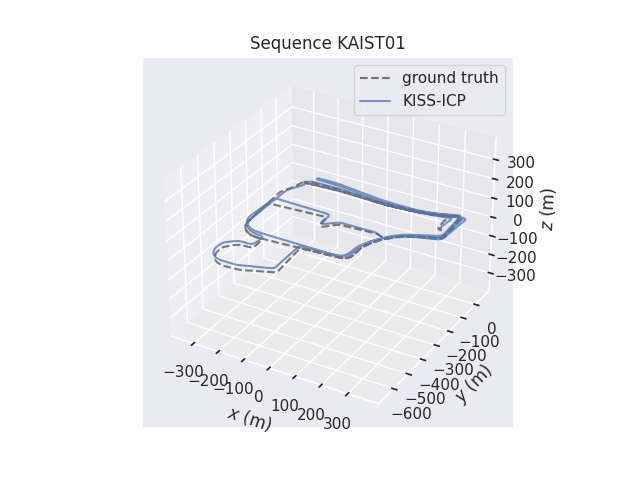

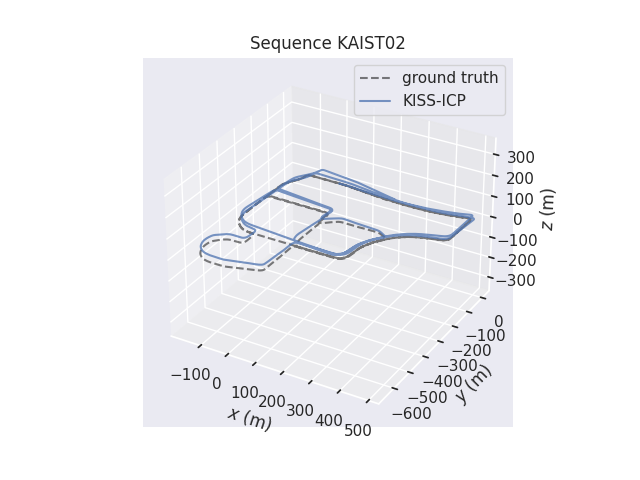

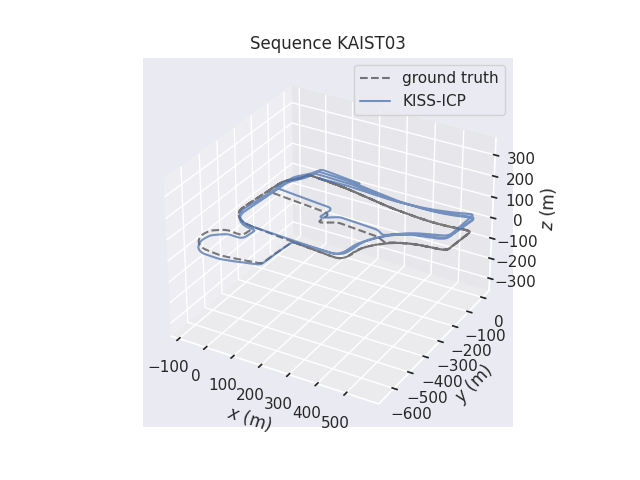

In [5]:
print_metrics_table(kaist_results, "KAIST")
plot_trajectories(kaist_results, close_all=False)

# Experiment Results DCC
|Metric|Value|Units|
|-:|:-:|:-|
Average Translation Error| 2.34|% |
Average Rotational Error| 0.64|deg/m |
Absoulte Trajectory Error (ATE)| 15.15|m |
Absoulte Rotational Error (ARE)| 0.05|rad |
Average Frequency| 35.67|Hz |
Average Runtime| 28.00|ms |


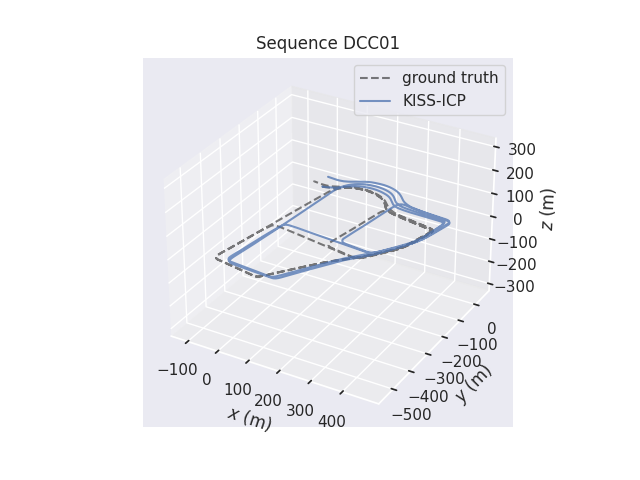

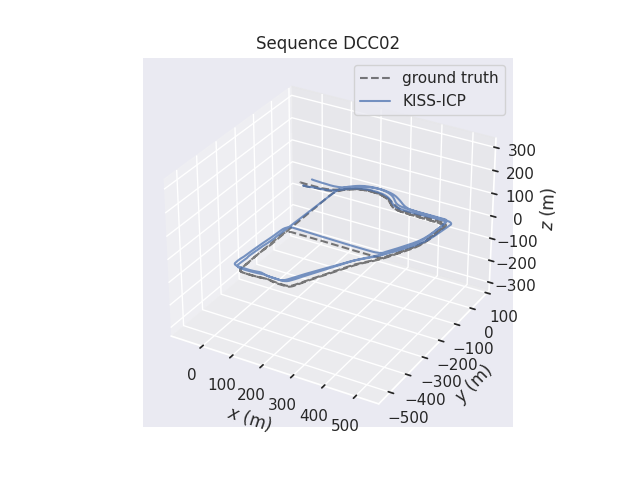

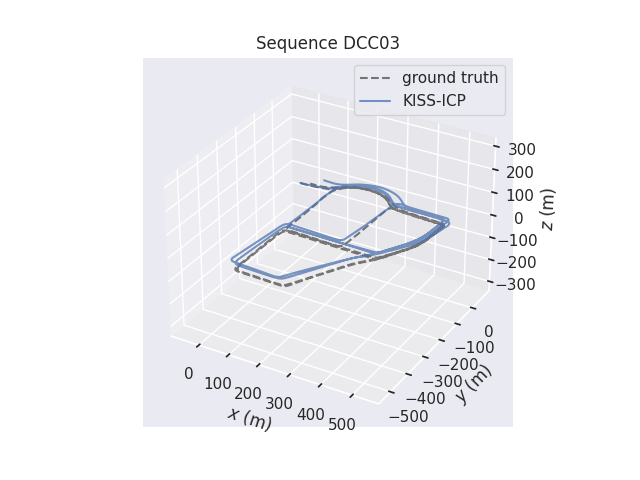

In [6]:
print_metrics_table(dcc_results, "DCC")
plot_trajectories(dcc_results, close_all=False)

# Experiment Results Riverside
|Metric|Value|Units|
|-:|:-:|:-|
Average Translation Error| 2.89|% |
Average Rotational Error| 0.64|deg/m |
Absoulte Trajectory Error (ATE)| 49.07|m |
Absoulte Rotational Error (ARE)| 0.08|rad |
Average Frequency| 46.33|Hz |
Average Runtime| 21.67|ms |


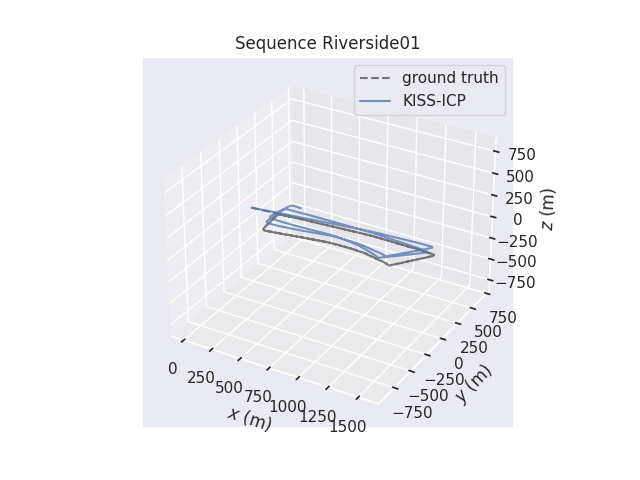

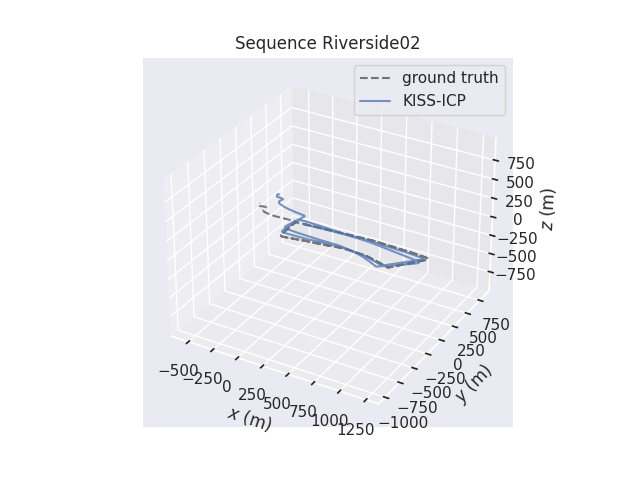

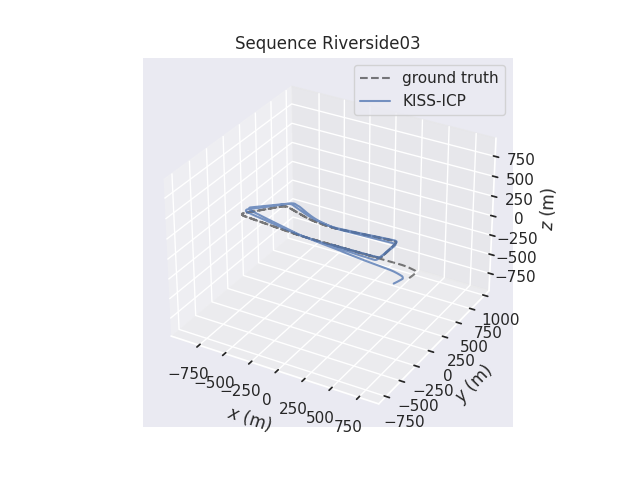

In [7]:
print_metrics_table(riverside_results, "Riverside")
plot_trajectories(riverside_results, close_all=False)

# Experiment Results Sejong
|Metric|Value|Units|
|-:|:-:|:-|
Average Translation Error| 4.68|% |
Average Rotational Error| 0.70|deg/m |
Absoulte Trajectory Error (ATE)| 1371.21|m |
Absoulte Rotational Error (ARE)| 0.33|rad |
Average Frequency| 43.33|Hz |
Average Runtime| 22.33|ms |


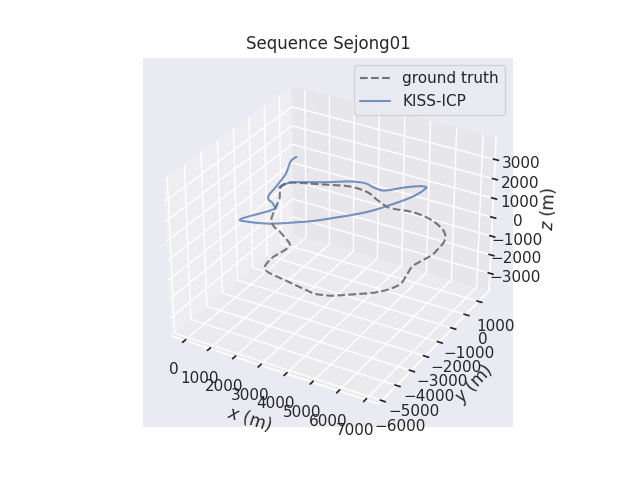

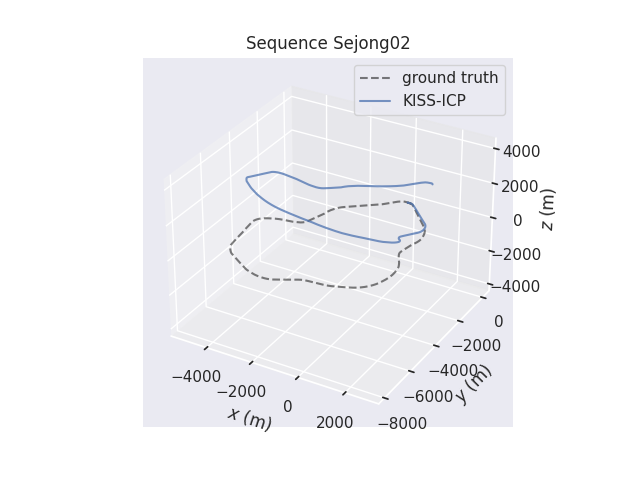

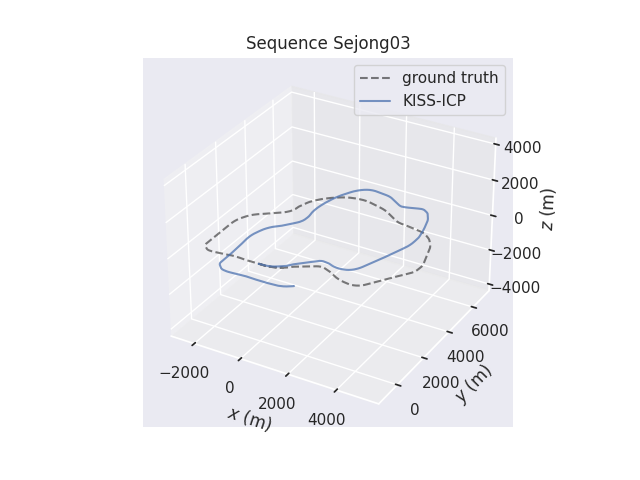

In [8]:
print_metrics_table(sejong_results, "Sejong")
plot_trajectories(sejong_results, close_all=False)